<a href="https://colab.research.google.com/github/zedeme/gradient-descent/blob/main/gh_DescensoDelGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import cm #Colors
import numpy as np
import matplotlib.pyplot as plt

## Funcion de Coste

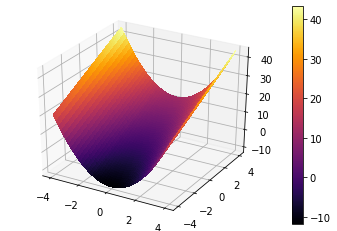

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

def f(x,y):
  return 2 * x**2 + 3 * y 

res = 100 

X, Y = np.linspace(-4,4,res), np.linspace(-4,4,res)

X,Y = np.meshgrid(X,Y)

Z = f(X,Y)

surf = ax.plot_surface(X,Y,Z, cmap=cm.inferno, linewidth=0, antialiased=False)

fig.colorbar(surf)

## Descenso del Gradiente

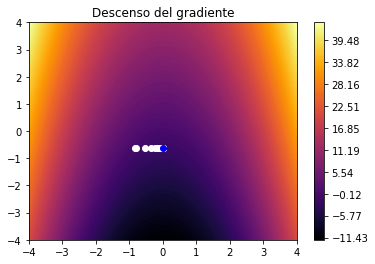

In [9]:
level_map = np.linspace(np.min(Z), np.max(Z), res)

plt.contourf(X,Y,Z, levels=level_map, cmap=cm.inferno)
plt.colorbar()
plt.title("Descenso del gradiente")

p = np.random.rand(2) * 8 - 4 # Scaling -4 to 4
h = 0.01 # Incremento
lr = 0.01 # Learning Rate

plt.plot(p[0], p[1], "o", c="w")

def derivate(cp, p):
  return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

def gradient(p):
  grad = np.zeros(2)

  for ind, val in enumerate(p):
    cp = np.copy(p)
    cp[ind]  = cp[ind] + h 

    dp = derivate(cp, p)
    grad[ind] = dp

    return grad
  
for i in range(200):
  p = p - lr*gradient(p)
  if (i%10 == 0):
    plt.plot(p[0], p[1], "o", c="w")

plt.plot(p[0], p[1], "o", c="b") # Last point
